In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import robustml
from robustml_model import Thermometer

from robustml_attack import Attack as Attack_Orig
from robustml_attack_ce import Attack as Attack_CE
from robustml_apgd import Attack as Attack_Apgd

In [2]:
# set up TensorFlow session
sess = tf.compat.v1.Session()

# initialize a model
model = Thermometer(sess)

# initialize a data provider for CIFAR-10 images
cifar_path = r'C:\Users\flint\OneDrive\Desktop\Purdue_Fall_2022\ECE_57000\Project_Files\Project\obfuscated-gradients\cifar10_data\test_batch'
provider = robustml.provider.CIFAR10(cifar_path)

eval_start_idx = 0
eval_end_idx = 10

# Initialize the attacks
attack_orig = Attack_Orig(sess, model.model, epsilon=model.threat_model.epsilon)
attack_ce = Attack_CE(sess, model.model, epsilon=model.threat_model.epsilon)
attack_apgd = Attack_Apgd(sess, model._model, epsilon=model.threat_model.epsilon)


Instructions for updating:
Use `tf.cast` instead.


Called
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.



Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../models/thermometer_advtrain/checkpoint-68000
restored



Original Attack

In [3]:
print('Evaluating the Original Attack')
success_rate = robustml.evaluate.evaluate(
    model,
    attack_orig,
    provider,
    start=eval_start_idx,
    end=eval_end_idx,
    deterministic=True,
    debug=False,
)

print('attack success rate: %.2f%% (over %d data points)' % (success_rate*100, eval_end_idx-eval_start_idx))

Evaluating the Original Attack


evaluating 0 of [0, 10)
evaluating 1 of [0, 10)
evaluating 2 of [0, 10)
evaluating 3 of [0, 10)
evaluating 4 of [0, 10)
evaluating 5 of [0, 10)
evaluating 6 of [0, 10)
evaluating 7 of [0, 10)
evaluating 8 of [0, 10)
evaluating 9 of [0, 10)


attack success rate: 90.00% (over 10 data points)


Original Attack with Cross Entropy Loss

In [4]:
print('Evaluating the Original Attack modified to use Cross Entropy Loss')
success_rate = robustml.evaluate.evaluate(
    model,
    attack_ce,
    provider,
    start=eval_start_idx,
    end=eval_end_idx,
    deterministic=True,
    debug=False,
)

print('attack success rate: %.2f%% (over %d data points)' % (success_rate*100, eval_end_idx-eval_start_idx))

Evaluating the Original Attack modified to use Cross Entropy Loss


evaluating 0 of [0, 10)
evaluating 1 of [0, 10)
evaluating 2 of [0, 10)
evaluating 3 of [0, 10)
evaluating 4 of [0, 10)
evaluating 5 of [0, 10)
evaluating 6 of [0, 10)
evaluating 7 of [0, 10)
evaluating 8 of [0, 10)
evaluating 9 of [0, 10)


attack success rate: 90.00% (over 10 data points)


Auto-PGD Attack

In [5]:
print('Evaluating the Auto-PGD Attack')
success_rate = robustml.evaluate.evaluate(
    model,
    attack_apgd,
    provider,
    start=eval_start_idx,
    end=eval_end_idx,
    deterministic=True,
    debug=False,
)

print('attack success rate: %.2f%% (over %d data points)' % (success_rate*100, eval_end_idx-eval_start_idx))

Evaluating the Auto-PGD Attack


evaluating 0 of [0, 10)
evaluating 1 of [0, 10)
evaluating 2 of [0, 10)
evaluating 3 of [0, 10)
evaluating 4 of [0, 10)
evaluating 5 of [0, 10)
evaluating 6 of [0, 10)
evaluating 7 of [0, 10)
evaluating 8 of [0, 10)


attack success rate: 90.00% (over 10 data points)


evaluating 9 of [0, 10)


Sample Adversarial Images

In [6]:
def get_logits(x):
    x = x * 255.0
    # first encode the input, then classify it
    encoded = model.encode(x)
    logits = tf.nn.softmax(model._model.pre_softmax)
    return model._sess.run(logits, {model._model.x_input: encoded})[0]
    

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_image_logits(img, logits, label):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    ax1.imshow(img)
    fig.sca(ax1)

    barlist = ax2.bar(range(10), logits)
    
    # Color the classified class red
    top_idx = np.argmax(logits)
    barlist[top_idx].set_color('r')
    
    # Color the correct class green
    barlist[label].set_color('g')
    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10), cifar_labels, rotation='vertical')
    fig.subplots_adjust(bottom=0.2)
    plt.show()

Retrieve Clean Image from Provider

In [7]:
img, label = provider[0]

Display the Clean Image along with the Model's Classification

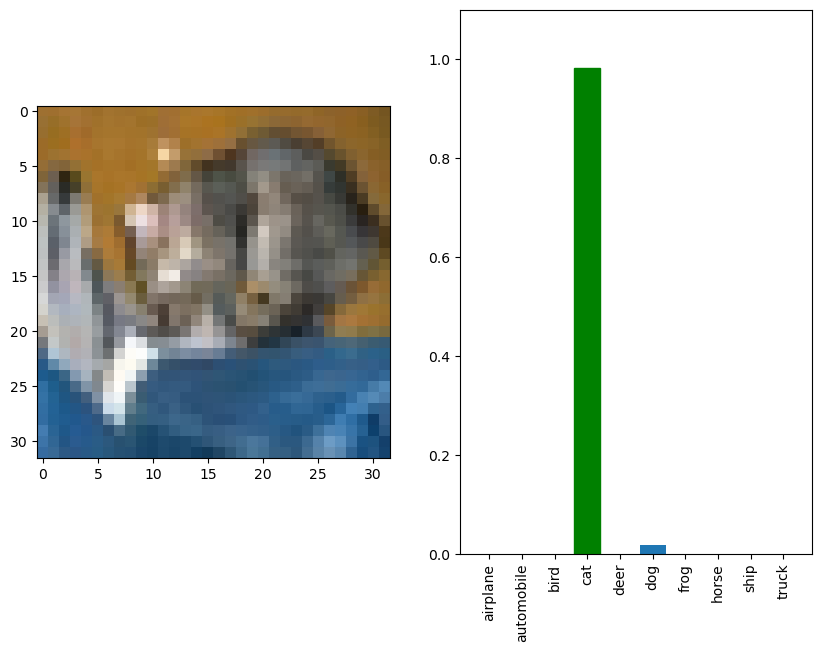

In [8]:
display_image_logits(np.copy(img), get_logits(np.copy(img)), label)

Run the Original Attack on the Image

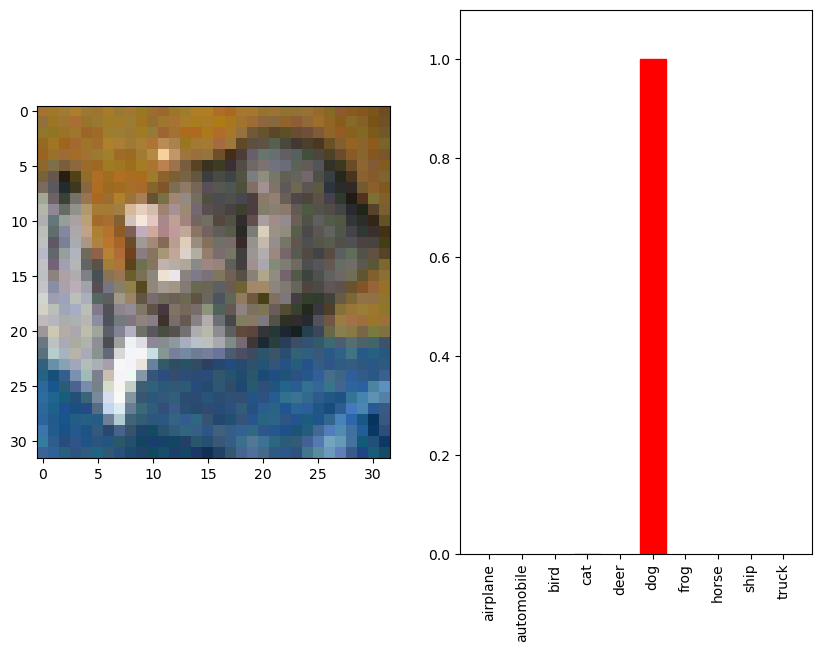

In [9]:
adv_orig = attack_orig.run(np.copy(img), label, None)
display_image_logits(adv_orig, get_logits(adv_orig), label)

Run the Original Attack modified to use Cross Entropy Loss on the Image

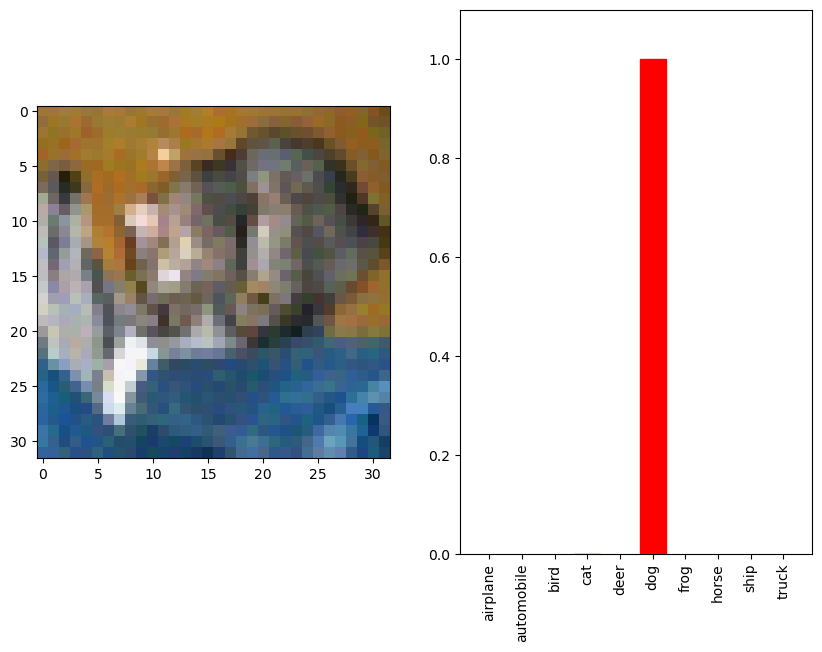

In [10]:
adv_ce = attack_ce.run(np.copy(img), label, None)
display_image_logits(adv_ce, get_logits(adv_ce), label)

Run the Auto-PGD Attack on the Image

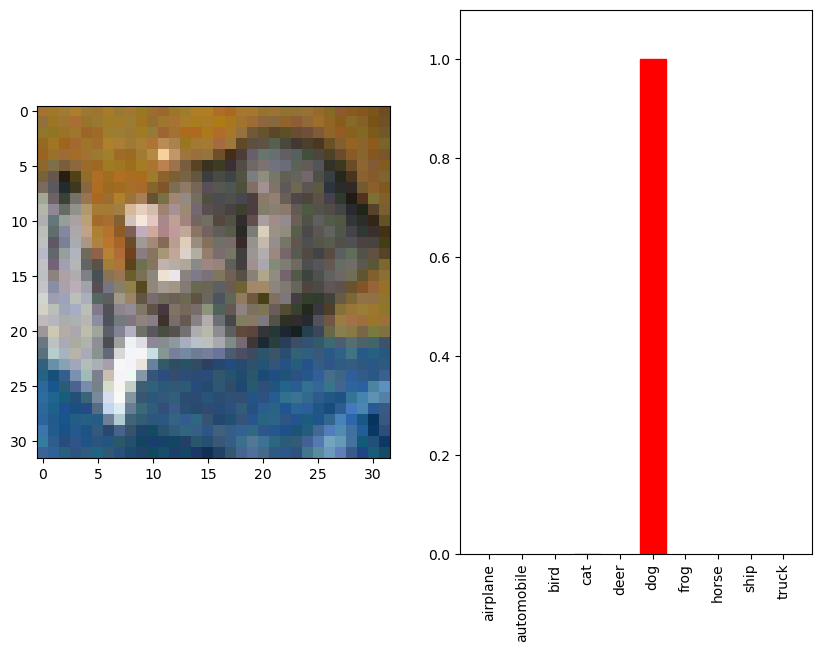

In [11]:
adv_apgd = attack_apgd.run(np.copy(img), label, None)
display_image_logits(adv_orig, get_logits(adv_apgd), label)